## Universidad Politécnica de San Luis Potosí
### Minería de Datos
### Ejemplo Mantenimiento Predictivo
###  Algoritmo Naive Bayes

En esta práctica aplicaremos el algoritmo Naive Bayes (Bayesiano ingenuo)
a un conjunto de datos para pronosticar manteniento. 
Conjunto de datos tomados de:
https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset#

### Carga de librerías

In [2]:
import pandas as ps

In [2]:
import numpy as np

In [3]:
import seaborn as sb

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Conjunto de datos modelados a partir de una fresadora, consta de 10000 registros de datos almacenados como filas con 14 características en columnas.

### Los datos:
#### Udi: Identificador único (1-10000)
#### ID: Id del producto
#### Type: Calidad del producto
### AT: Temperatura del aire
### PT: Temperatura del proceso
### RS:Velocidad de rotación
### T: Torque
### TW: Desgaste de la herramienta
### MF: Falla en máquina
#### Twf, Hdf, Pwf, Osf, Rnf: 5 diferentes modos de fallo (independientes)

### Lectura de datos

In [3]:
datos = ps.read_csv("F:/Prolag/ai4i2020_R.csv")
datos

,Udi,ID,Type,AT,PT,RS,T,TW,MF,Twf,Hdf,Pwf,Osf,Rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### Exploramos los datos

In [7]:
datos.head(3)

,Udi,ID,Type,AT,PT,RS,T,TW,MF,Twf,Hdf,Pwf,Osf,Rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Udi     10000 non-null  int64  
 1   ID      10000 non-null  object 
 2   Type    10000 non-null  object 
 3   AT      10000 non-null  float64
 4   PT      10000 non-null  float64
 5   RS      10000 non-null  int64  
 6   T       10000 non-null  float64
 7   TW      10000 non-null  int64  
 8   MF      10000 non-null  int64  
 9   Twf     10000 non-null  int64  
 10  Hdf     10000 non-null  int64  
 11  Pwf     10000 non-null  int64  
 12  Osf     10000 non-null  int64  
 13  Rnf     10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [9]:
# ver cuántos hay de cada clase
print(datos.groupby('MF').size())

MF
0    9661
1     339
dtype: int64


<AxesSubplot:>

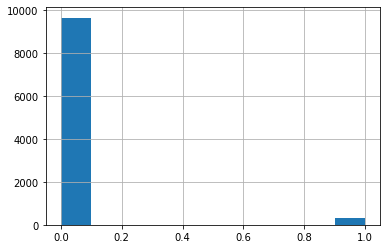

In [10]:
# ver histograma
datos.MF.hist()

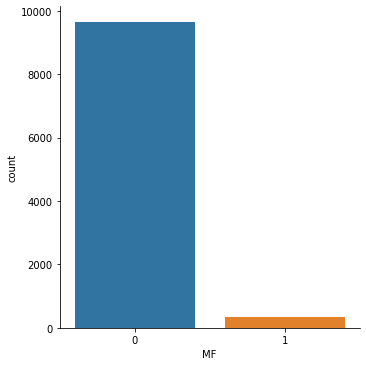

In [11]:
sb.catplot(x='MF', data=datos, kind="count")

In [15]:
datos2 = datos[['AT','PT','RS','T','TW','MF']]
datos2

,AT,PT,RS,T,TW,MF
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


### Separamos conjunto de entrenamiento (70%)  y conjunto de prueba (30%) 

In [20]:
X_train, X_test = train_test_split(datos2, test_size=0.3, random_state=42)

In [21]:
X_train

,AT,PT,RS,T,TW,MF
9069,297.2,308.2,1678,28.1,133,0
2603,299.3,309.2,1334,46.3,31,0
7738,300.5,312.0,1263,60.8,146,0
1579,298.3,308.3,1444,43.8,176,0
5058,303.9,312.9,1526,42.5,194,0
...,...,...,...,...,...,...
5734,302.3,311.8,1369,56.2,208,1
5191,304.0,313.2,1416,46.0,128,0
5390,302.8,312.3,1483,47.2,223,0
860,296.1,306.9,1541,32.6,33,0


### Separamos variable dependiente en "y", variables independientes en "X"

In [22]:
y_train = X_train['MF']
y_test = X_test['MF']

In [23]:
X_train = X_train.drop(['MF'], axis=1)
X_train

,AT,PT,RS,T,TW
9069,297.2,308.2,1678,28.1,133
2603,299.3,309.2,1334,46.3,31
7738,300.5,312.0,1263,60.8,146
1579,298.3,308.3,1444,43.8,176
5058,303.9,312.9,1526,42.5,194
...,...,...,...,...,...
5734,302.3,311.8,1369,56.2,208
5191,304.0,313.2,1416,46.0,128
5390,302.8,312.3,1483,47.2,223
860,296.1,306.9,1541,32.6,33


In [24]:
y_train

9069    0
2603    0
7738    0
1579    0
5058    0
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: MF, Length: 7000, dtype: int64

In [25]:
X_test = X_test.drop(['MF'], axis=1)
X_test

,AT,PT,RS,T,TW
6252,300.8,310.3,1538,36.1,198
4684,303.6,311.8,1421,44.8,101
1731,298.3,307.9,1485,42.0,117
4742,303.3,311.3,1592,33.7,14
4521,302.4,310.4,1865,23.9,129
...,...,...,...,...,...
8014,300.9,312.0,1500,44.2,188
1074,297.0,307.9,1595,31.7,170
3063,300.0,309.1,1431,45.4,90
6487,300.6,309.8,1541,36.2,166


In [26]:
y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: MF, Length: 3000, dtype: int64

In [27]:
gauss = GaussianNB()

# Para datos contínuos hay que utilizar
# gauss = GaussianNB()

### Entrenamos nuestro modelo (datos de entrenamiento 70%)

In [32]:
gauss.fit(X_train, y_train)

GaussianNB()

### Realizamos pronóstico (datos de prueba 30%)

In [33]:
pronostico = gauss.predict(X_test)

In [34]:
pronostico

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Calculamos la eficacia del modelo

In [35]:
print (gauss.score(X_test,y_test))

0.964


In [36]:
confusion_matrix(y_test, pronostico)

array([[2873,   34],
       [  74,   19]], dtype=int64)

### El modelo ya entrenado y probado podemos utilizarlo para 
### pronosticar valores de datos nuevos (de los que no conocemos 
### la necesidad de mantenimiento)
### usaríamos:
### pronostico_nuevos = gauss.predict(datos_nuevos)

## Modelo 2 (estandarizado)

In [37]:
estandariza = StandardScaler()

In [38]:
X_train2 = estandariza.fit_transform(X_train)
X_test2 = estandariza.fit_transform(X_test)

In [39]:
gauss.fit(X_train2, y_train)

GaussianNB()

In [40]:
pronostico = gauss.predict(X_test2)

In [41]:
print (gauss.score(X_test2,y_test))

0.9636666666666667


In [42]:
confusion_matrix(y_test, pronostico)

array([[2871,   36],
       [  73,   20]], dtype=int64)

### Este segundo modelo es casi igual en cuanto su nivel de pronóstico, 
### es posible realizar más modelos agregando o quitando variables.  
### Ambos modelos son buenos en la predicción en general, pero podría 
### interesarnos más la predicción de los que fallan o de los que no fallan.